In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

# Download and EDA

In [17]:
PATH_NAME = './dl-course_kaggle_task/'

In [18]:
os.listdir(PATH_NAME)

['test.csv', 'train.csv', 'submission.csv']

In [44]:
df_train = pd.read_csv(PATH_NAME + 'train.csv')
df_test = pd.read_csv(PATH_NAME + 'test.csv')

In [24]:
#train dataset
df_train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3313,54,108.00,5760.65,Male,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
2967,8,105.50,829.55,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3044,3,24.75,66.95,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
941,13,54.15,701.05,Female,0,Yes,Yes,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Bank transfer (automatic),0
300,28,92.35,2602.9,Female,0,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,1


In [22]:
df_train.shape

(5282, 20)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [31]:
# number of unique values in each feature
df_train.nunique()

ClientPeriod                  73
MonthlySpending             1468
TotalSpent                  4978
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64

In [33]:
# there are so many values in TotalSpent, but this variable not float or int, check type of it
df_train['TotalSpent'].dtype

dtype('O')

In [38]:
pd.Series(df_train['TotalSpent'].unique()).sort_values()

1034          
3212     100.2
687     100.25
887     100.35
1565     100.4
         ...  
3413    996.85
141     996.95
4105    997.65
3244     998.1
1140     999.9
Length: 4978, dtype: object

In [39]:
df_test['TotalSpent'].sort_values().values

array([' ', ' ', '100.8', ..., '997.75', '999.45', '999.8'], dtype=object)

Problem is ' '. It in test and train data, but variable is numeric, replace ' ' on some number

In [45]:
df_train['TotalSpent'] = df_train['TotalSpent'].replace(' ', 1)
df_test['TotalSpent'] = df_test['TotalSpent'].replace(' ', 1)

In [46]:
df_train['TotalSpent'] = df_train['TotalSpent'].astype('float')
df_test['TotalSpent'] = df_test['TotalSpent'].astype('float')

There are binary, numeric and categorical variables. Let's divide and analize them

In [104]:
# split df_train into X(data) and y(target)
X_train = df_train.drop('Churn', axis=1)
y = df_train['Churn']

In [105]:
bin_columns = X_train.nunique()[X_train.nunique() == 2].index.tolist()
bin_columns

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'IsBillingPaperless']

In [106]:
numeric_columns = X_train.nunique()[X_train.nunique() > 20].index.tolist()
numeric_columns

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

In [107]:
categ_columns = list(set(X_train.columns) - (set(bin_columns + numeric_columns)))
categ_columns

['HasOnlineBackup',
 'HasInternetService',
 'HasDeviceProtection',
 'HasOnlineSecurityService',
 'HasMovieSubscription',
 'HasContractPhone',
 'PaymentMethod',
 'HasOnlineTV',
 'HasTechSupportAccess',
 'HasMultiplePhoneNumbers']

In [108]:
(len(X_train.columns)) == (len(bin_columns) + len(numeric_columns) + len(categ_columns))

True

Analysis of data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

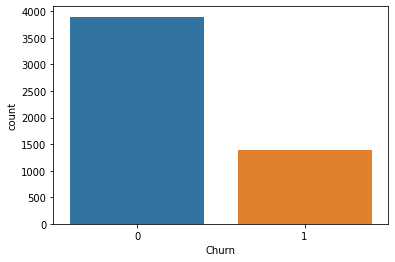

In [72]:
# analysis of target. We see disbalanced classes
sns.countplot(y)

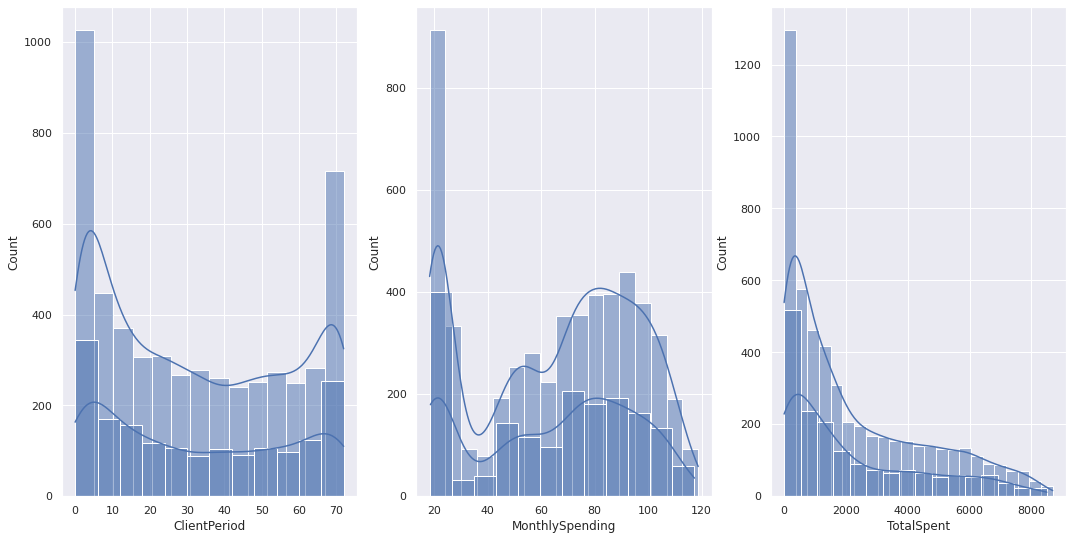

In [109]:
sns.set()
_, axes = plt.subplots(1, len(numeric_columns), figsize=(18, 9))
for i in range(len(numeric_columns)):
    sns.histplot(data=X_train[numeric_columns[i]], ax=axes[i], kde=True)
    sns.histplot(data=df_test[numeric_columns[i]], ax=axes[i], kde=True)

Conclusion: numeric train and test data have equal distribution

In [82]:
# Let's check distribution of numeric data by Churn

In [110]:
is_gone = X_train[y == 1]
is_here = X_train[y == 0]

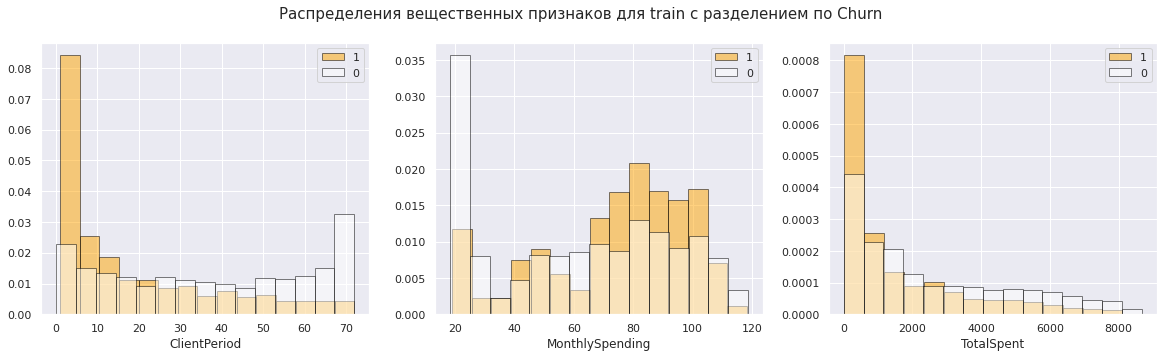

In [111]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
axes = axes.ravel()
for i, cat in enumerate(numeric_columns):
    axes[i].hist(x=is_gone[cat], density=True, alpha=0.5, bins=15, label='1', edgecolor='black', color='orange')
    axes[i].hist(x=is_here[cat], density=True, alpha=0.5, bins=15, label='0', edgecolor='black', color='white')
    axes[i].set(xlabel = cat)
    axes[i].legend()
fig.suptitle('Распределения вещественных признаков для train с разделением по Churn', fontsize=15);

In [113]:
# Let's compare distributions of churn and non churn classes using mann-whitneyu test, significance value=0.01
# H0 - churn and non churn get from same distribution
from scipy.stats import mannwhitneyu

In [112]:
for i, cat in enumerate(numeric_columns):
    p = mannwhitneyu(is_gone[cat], is_here[cat]).pvalue
    print(f'for {cat} p-value: {p}')

for ClientPeriod p-value: 3.0185665779997006e-155
for MonthlySpending p-value: 8.486407520895914e-37
for TotalSpent p-value: 5.317804071794011e-63


all p-values less than 0.01, it means that churn and non churn taken from different distribution for numeric data

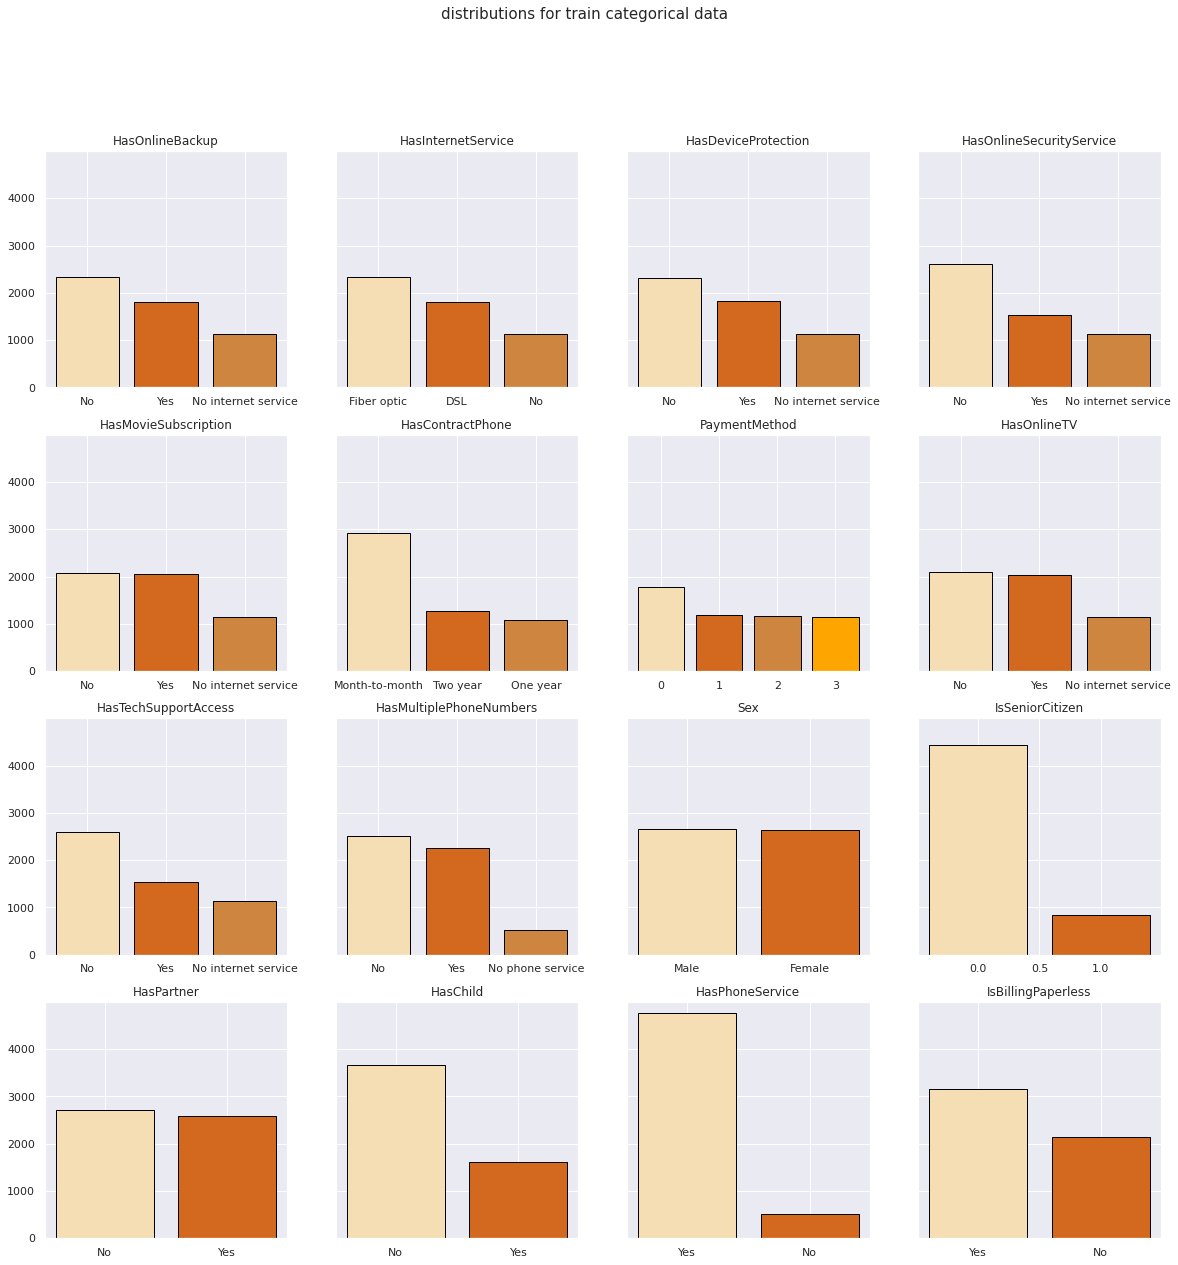

In [120]:
# Analysis of categorical data
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20), sharey=True)
ax = axes.ravel()
fig.suptitle('distributions for train categorical data', fontsize=15)
for i, cat in enumerate(categ_columns + bin_columns):
    x = X_train[cat].value_counts()
    index = x.index
    if cat == 'PaymentMethod':
        index = [i for i in range(len(index))]
    ax[i].bar(x=index, height=x, color=['wheat', 'chocolate', 'peru', 'orange'], edgecolor='black')
    ax[i].set_title(cat)

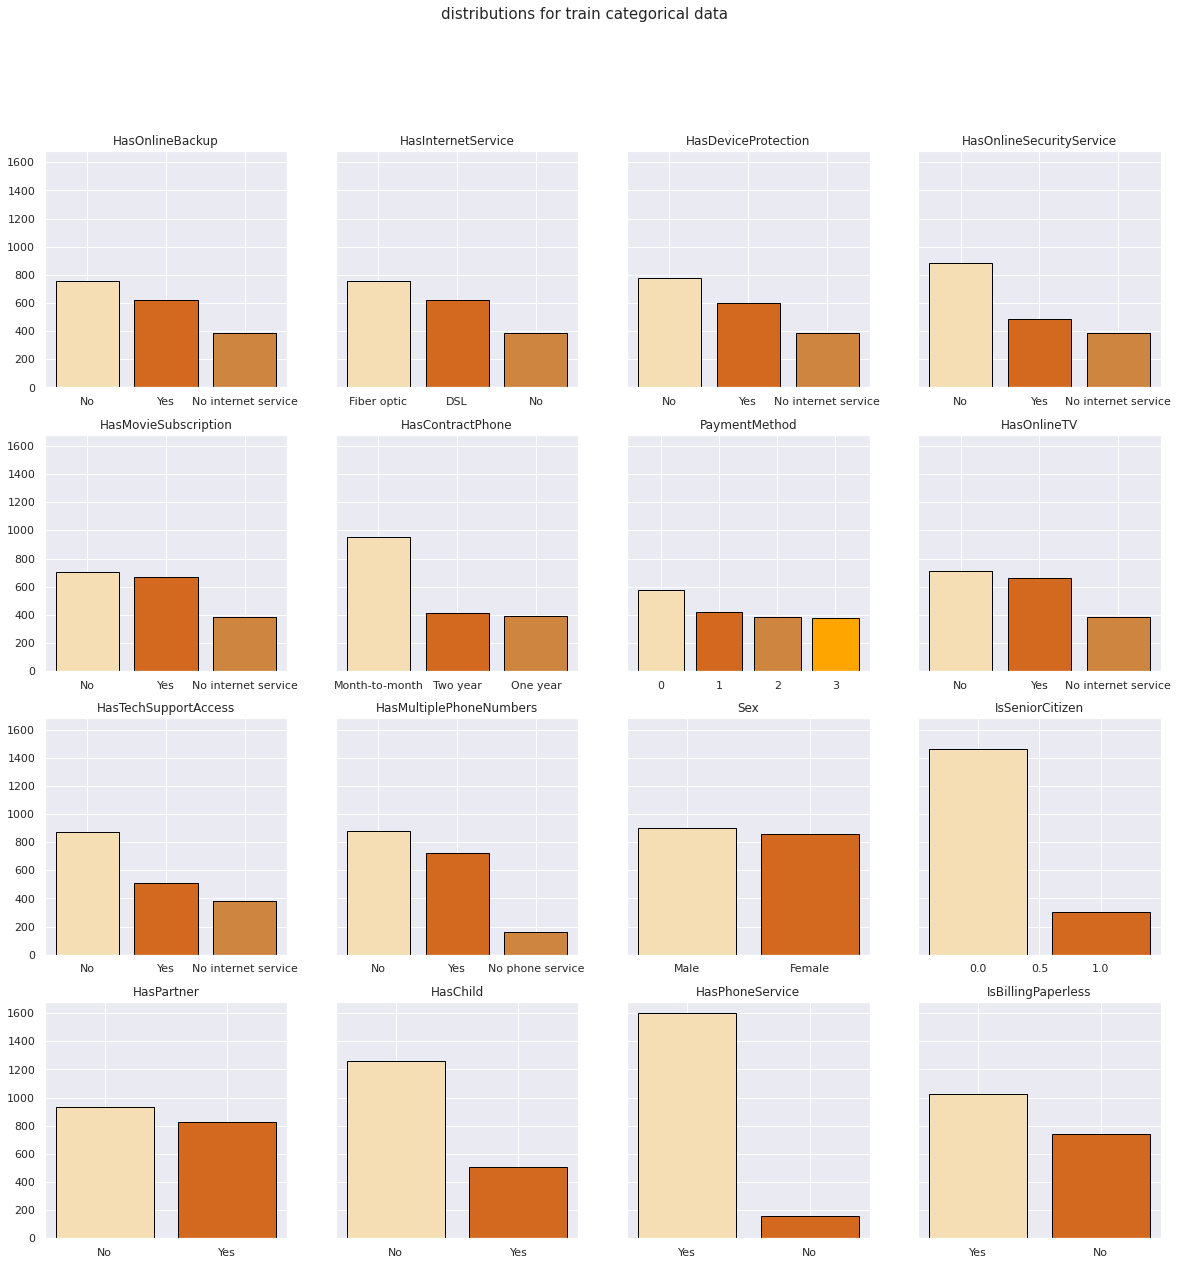

In [121]:
# Then check distributions of test categorical data
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20), sharey=True)
ax = axes.ravel()
fig.suptitle('distributions for train categorical data', fontsize=15)
for i, cat in enumerate(categ_columns + bin_columns):
    x = df_test[cat].value_counts()
    index = x.index
    if cat == 'PaymentMethod':
        index = [i for i in range(len(index))]
    ax[i].bar(x=index, height=x, color=['wheat', 'chocolate', 'peru', 'orange'], edgecolor='black')
    ax[i].set_title(cat)

Conclusion: train and test categorical data have same distribution

# Implementation baseline (we will use Logictic regression as baseline)

In [123]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [124]:
# use one hot encoder for binary data
X_train[bin_columns] = X_train[bin_columns].apply(LabelEncoder().fit_transform)

In [147]:
df_test[bin_columns] = df_test[bin_columns].apply(LabelEncoder().fit_transform)

In [125]:
X = pd.concat((X_train[bin_columns + numeric_columns], pd.get_dummies(X_train[categ_columns])), axis=1)

In [129]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [128]:
scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_val[numeric_columns] = scaler.transform(x_val[numeric_columns])

In [132]:
# initialize model. As metric we will use roc-auc score because of disbalanced classes
Cs = np.logspace(-3, 2, 30)
log_rg = LogisticRegressionCV(Cs=Cs, random_state=42, scoring='roc_auc')

In [133]:
log_rg.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegressionCV(Cs=array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02]),
                     random_state=42, scoring='roc_auc')

In [135]:
best_C = log_rg.C_[0]
best_C

0.2592943797404667

In [136]:
from sklearn.metrics import roc_auc_score

In [138]:
roc_auc_score(y_val, log_rg.predict_proba(x_val)[:, 1])

0.8266954044162799

# Implementation of catboost algorithm

In [139]:
from catboost import CatBoostClassifier, Pool

In [140]:
params = {'n_estimators': [298], 
          'max_depth': [3], 
          'subsample': np.linspace(0.55, 0.6, 10), 
          'l2_leaf_reg': np.linspace(3, 3.5, 5), 
          'random_strength': np.linspace(1.1, 1.2, 10), 
          'eta': np.linspace(0.09, 0.1, 10), 
          'min_data_in_leaf': [5], 
          'random_state': [42]}

In [141]:
clf = CatBoostClassifier(**{'grow_policy': 'Lossguide','eval_metric': 'AUC:hints=skip_train~false', 
                                        'loss_function': 'Logloss', 'auto_class_weights': 'Balanced', 
                                        'logging_level': 'Silent'})

In [143]:
pool_train = Pool(X_train, label=y, cat_features=categ_columns)

In [ ]:
clf.grid_search(params, X=pool_train)

In [144]:
# best model after grid search 
best_clf = CatBoostClassifier(**{'loss_function': 'Logloss',
                                'logging_level': 'Silent',
                                'auto_class_weights': 'Balanced',
                                'eval_metric': 'AUC:hints=skip_train~false',
                                'grow_policy': 'Lossguide',
                                'min_data_in_leaf': 5,
                                'random_seed': 777,
                                'depth': 2,
                                'iterations': 298,
                                'subsample': 0.57399,
                                'random_strength': 1.156123124308042,
                                'learning_rate': 0.0999990001,
                                'l2_leaf_reg': 3.40142341231})

In [145]:
best_clf.fit(pool_train)

In [153]:
# Make submission
y_pred = best_clf.predict_proba(df_test)[:, 1]

In [150]:
submission = pd.read_csv(PATH_NAME + 'submission.csv', index_col='Id')

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [154]:
submission['Churn'] = y_pred

In [156]:
submission.to_csv('my_submit_1.csv', index=False)

Andrey Shishkov: kaggle Score: 0.85461
position 62